In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adult_with_headers.csv')
data.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.shape

(32561, 15)

In [6]:
data.duplicated().sum()

24

In [7]:
data[data.duplicated()]

age          workclass  fnlwgt      education  education_num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      race      sex  capital_gain  capital_loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White     Male             0             0   
17040                White     Male             0             0   
18555                Black     Male         

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(32537, 15)

In [10]:
data.duplicated().sum()

0

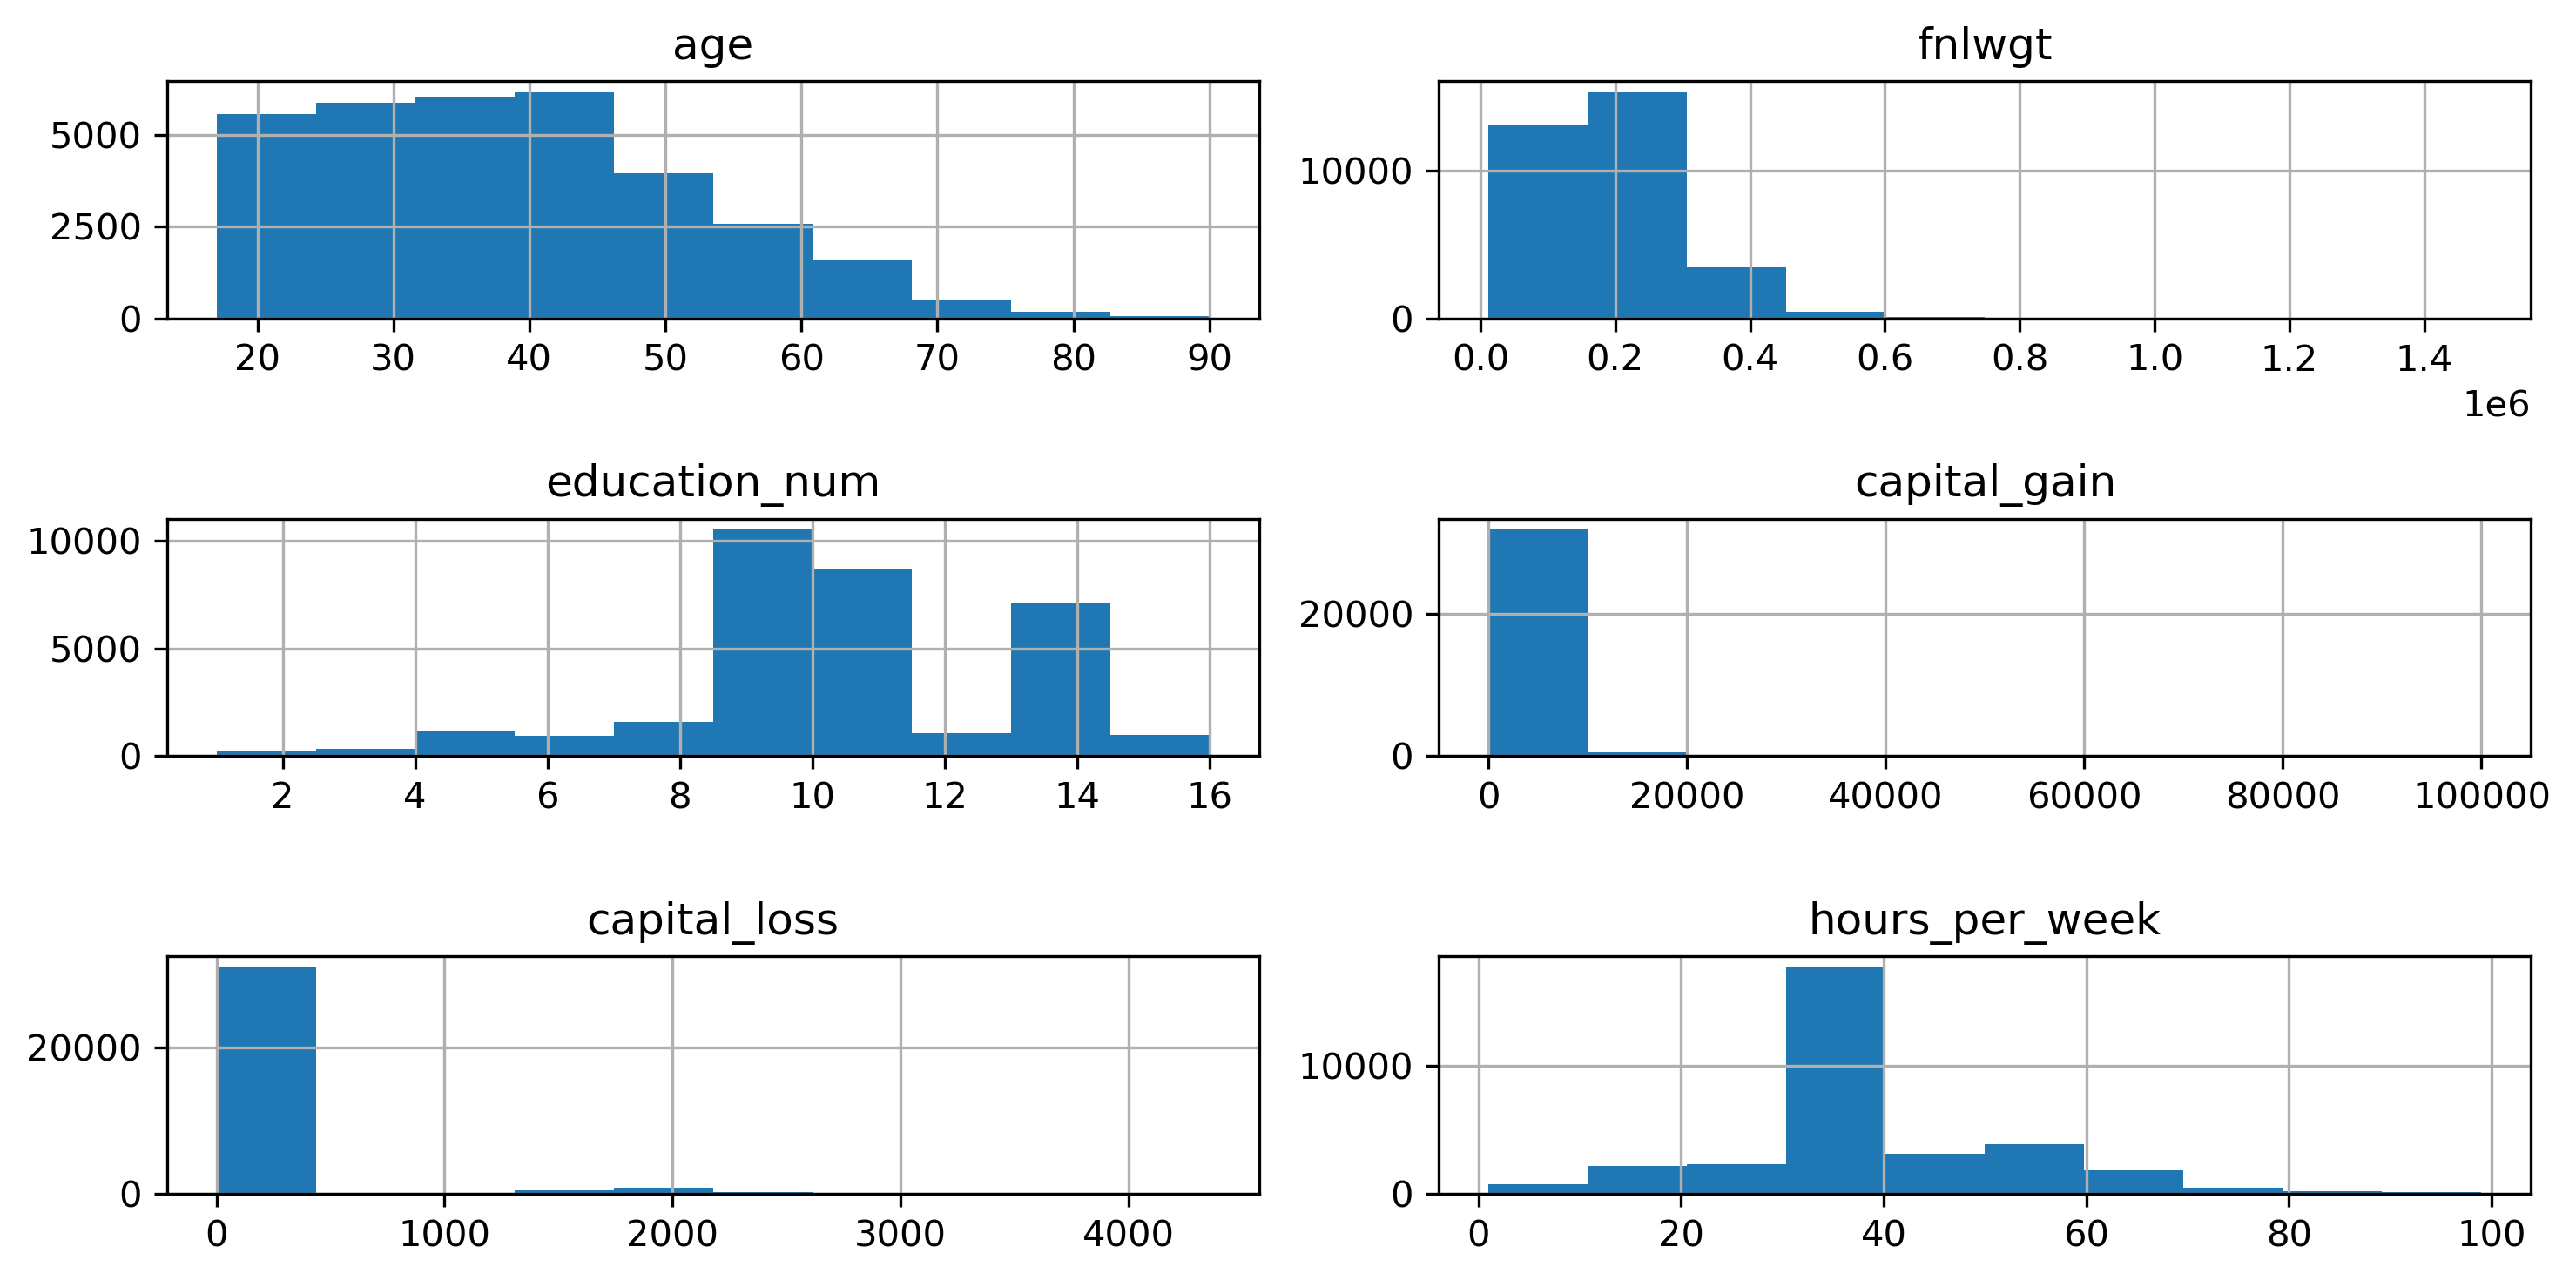

In [11]:
# dropping unnecessary columns 
data.hist()
plt.tight_layout()

In [12]:
data.capital_gain.unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [13]:
data['capital_loss'].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [14]:
# missing value imputation 
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<Axes: >

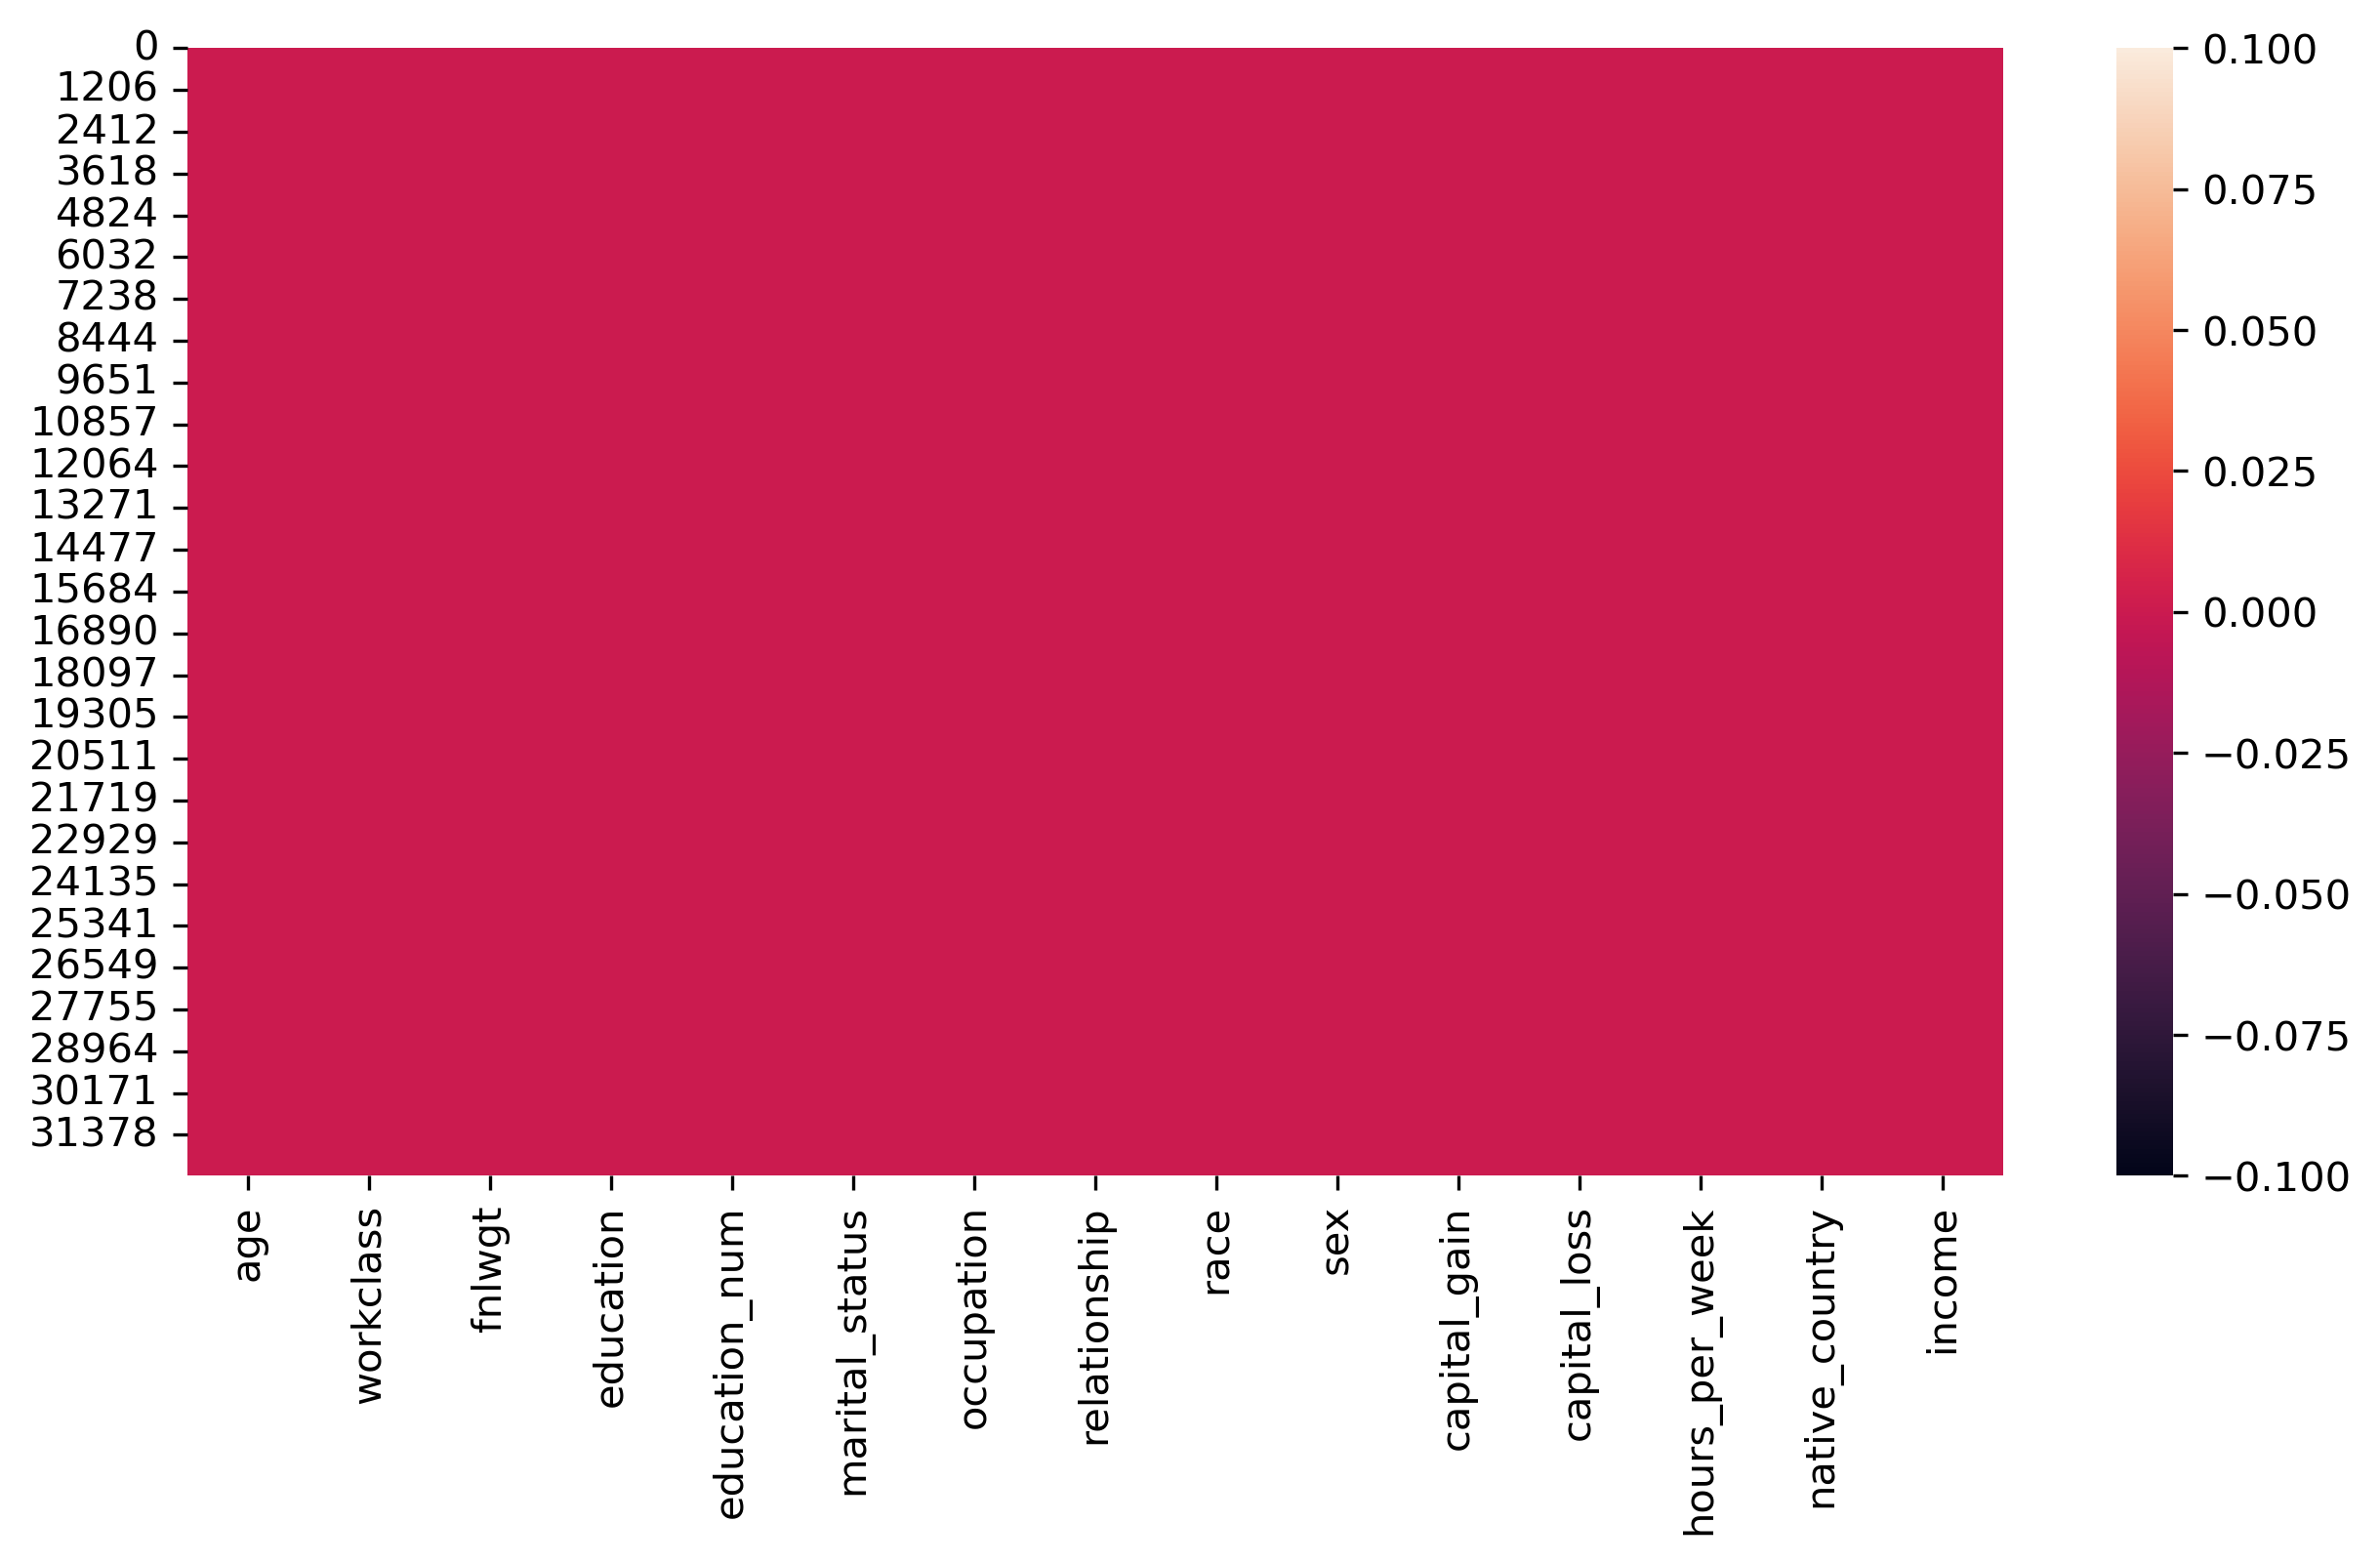

In [15]:
sns.heatmap(data.isna())

In [16]:
# there are no missing values

<Axes: >

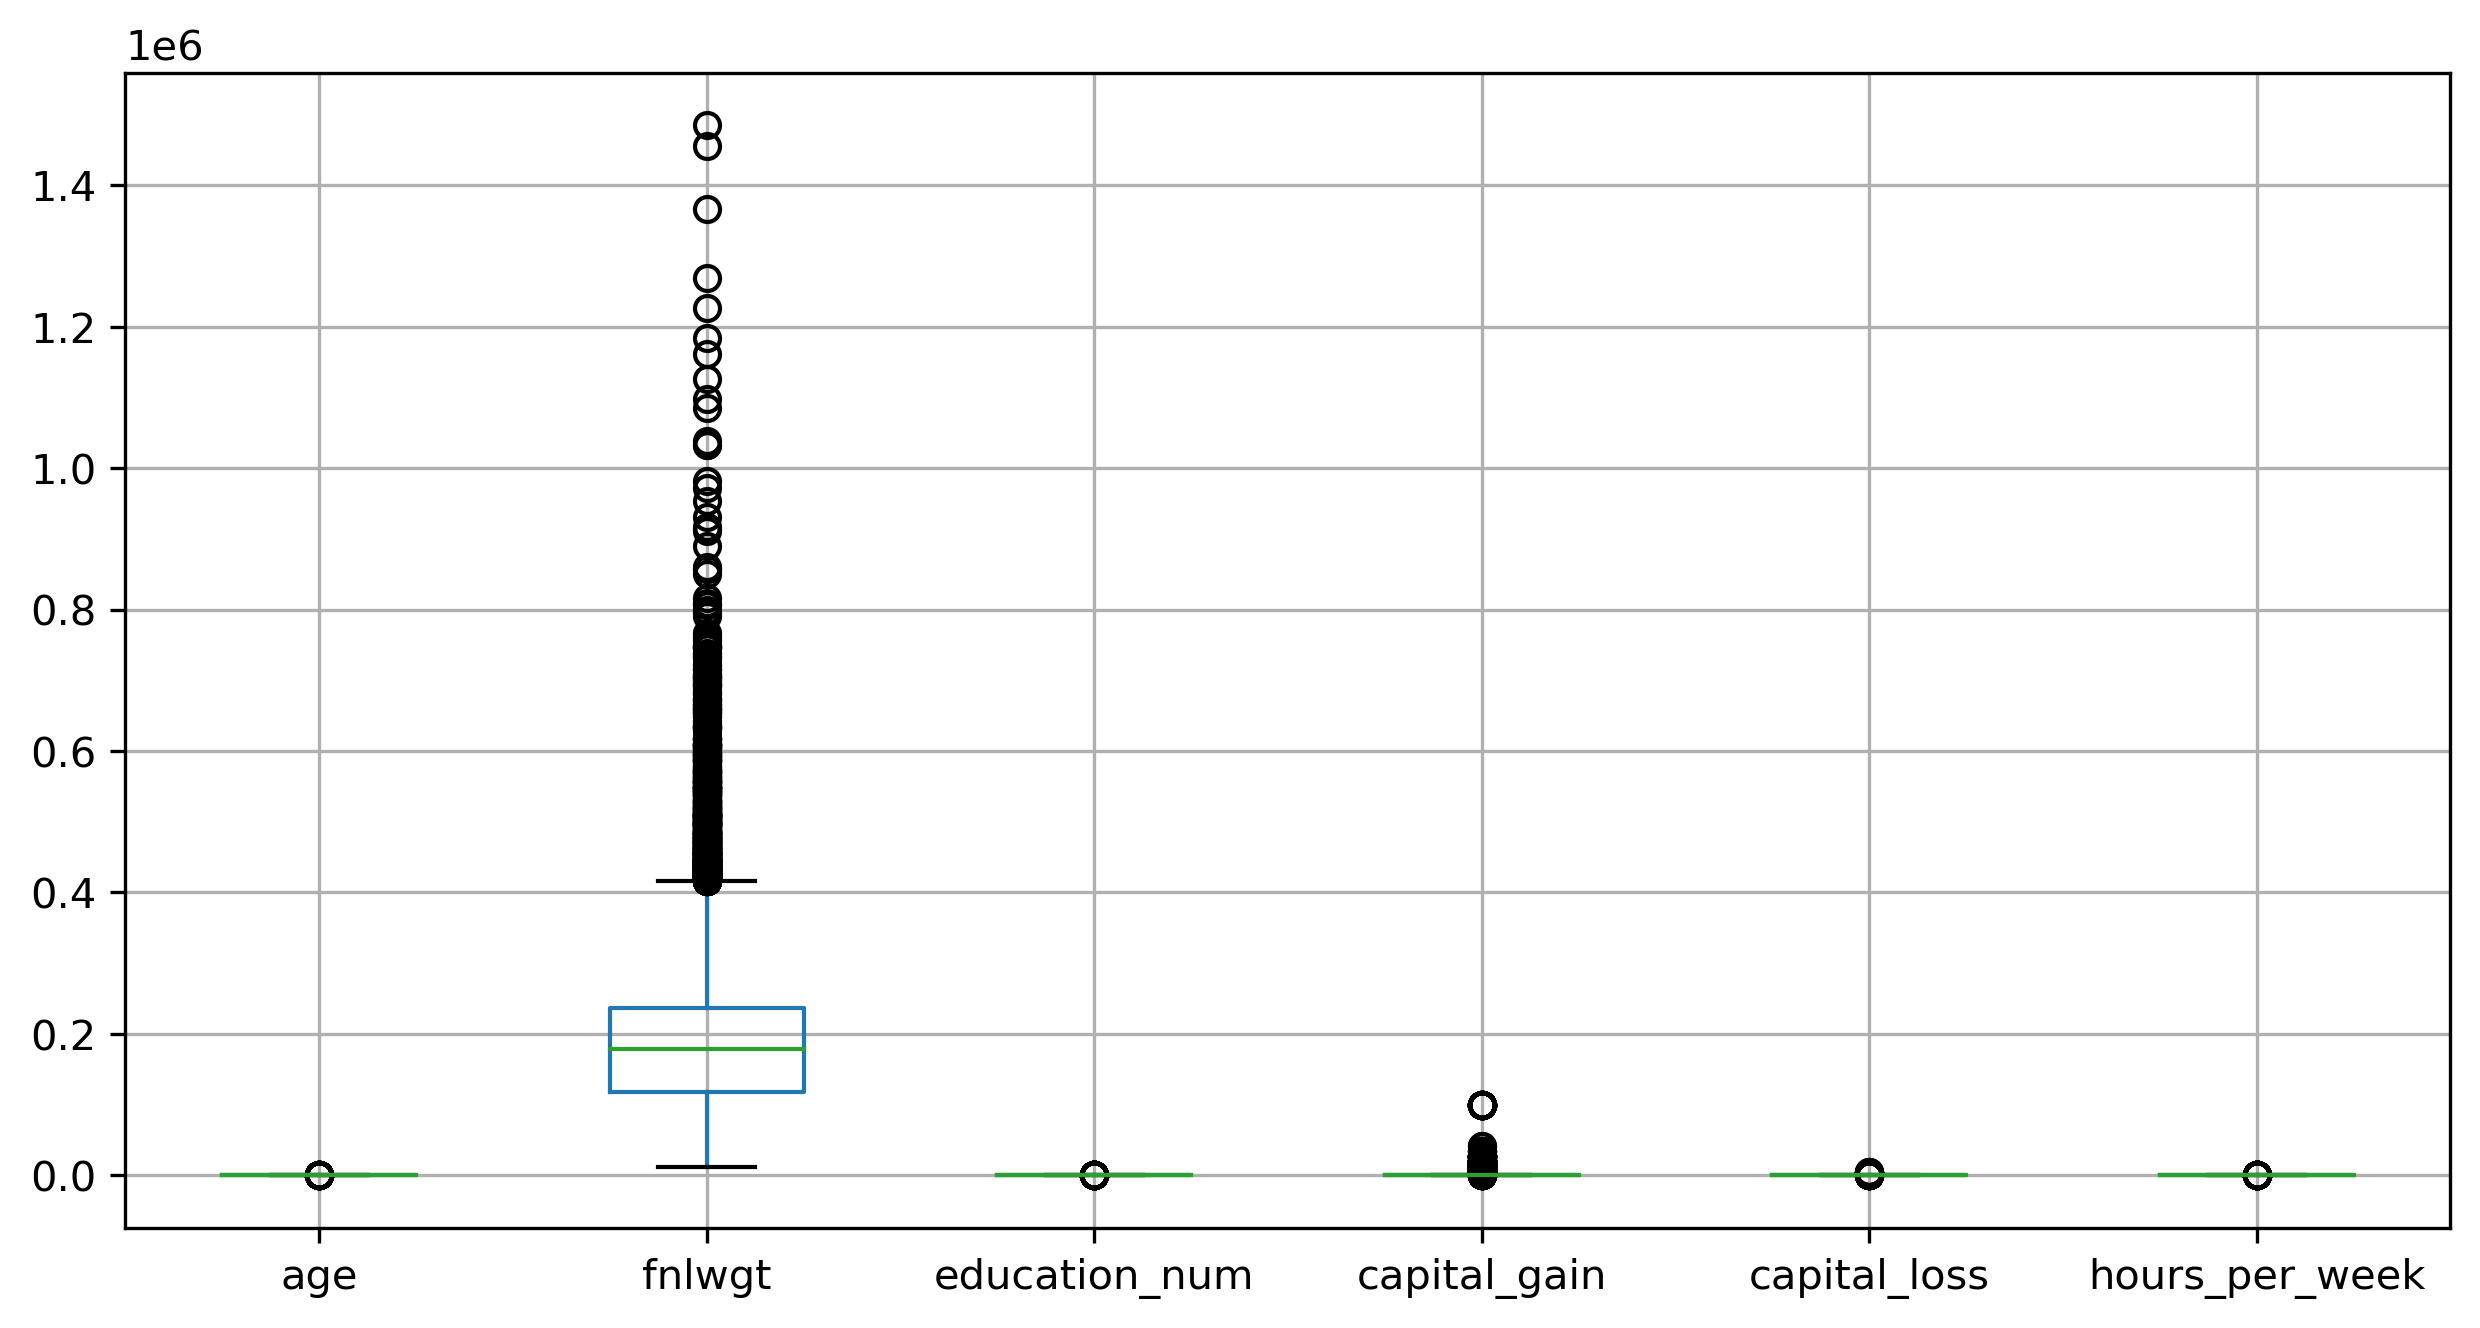

In [17]:
# checking for outliers 
data.boxplot()

In [18]:
# in each column there are outliers present 
# we will define two functions for detecting and treating outliers 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1 
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [19]:
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers of Column {colname} are treated !!!")

In [20]:
data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227   
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32537.000000  
mean        40.440329  
std         12.346889  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [21]:
outlier_treatment(data,'age')
outlier_treatment(data,'fnlwgt')
outlier_treatment(data,'education_num')
outlier_treatment(data,'capital_gain')
outlier_treatment(data,'capital_loss')
outlier_treatment(data,'hours_per_week')

All the outliers of Column age are treated !!!
All the outliers of Column fnlwgt are treated !!!
All the outliers of Column education_num are treated !!!
All the outliers of Column capital_gain are treated !!!
All the outliers of Column capital_loss are treated !!!
All the outliers of Column hours_per_week are treated !!!


<Axes: >

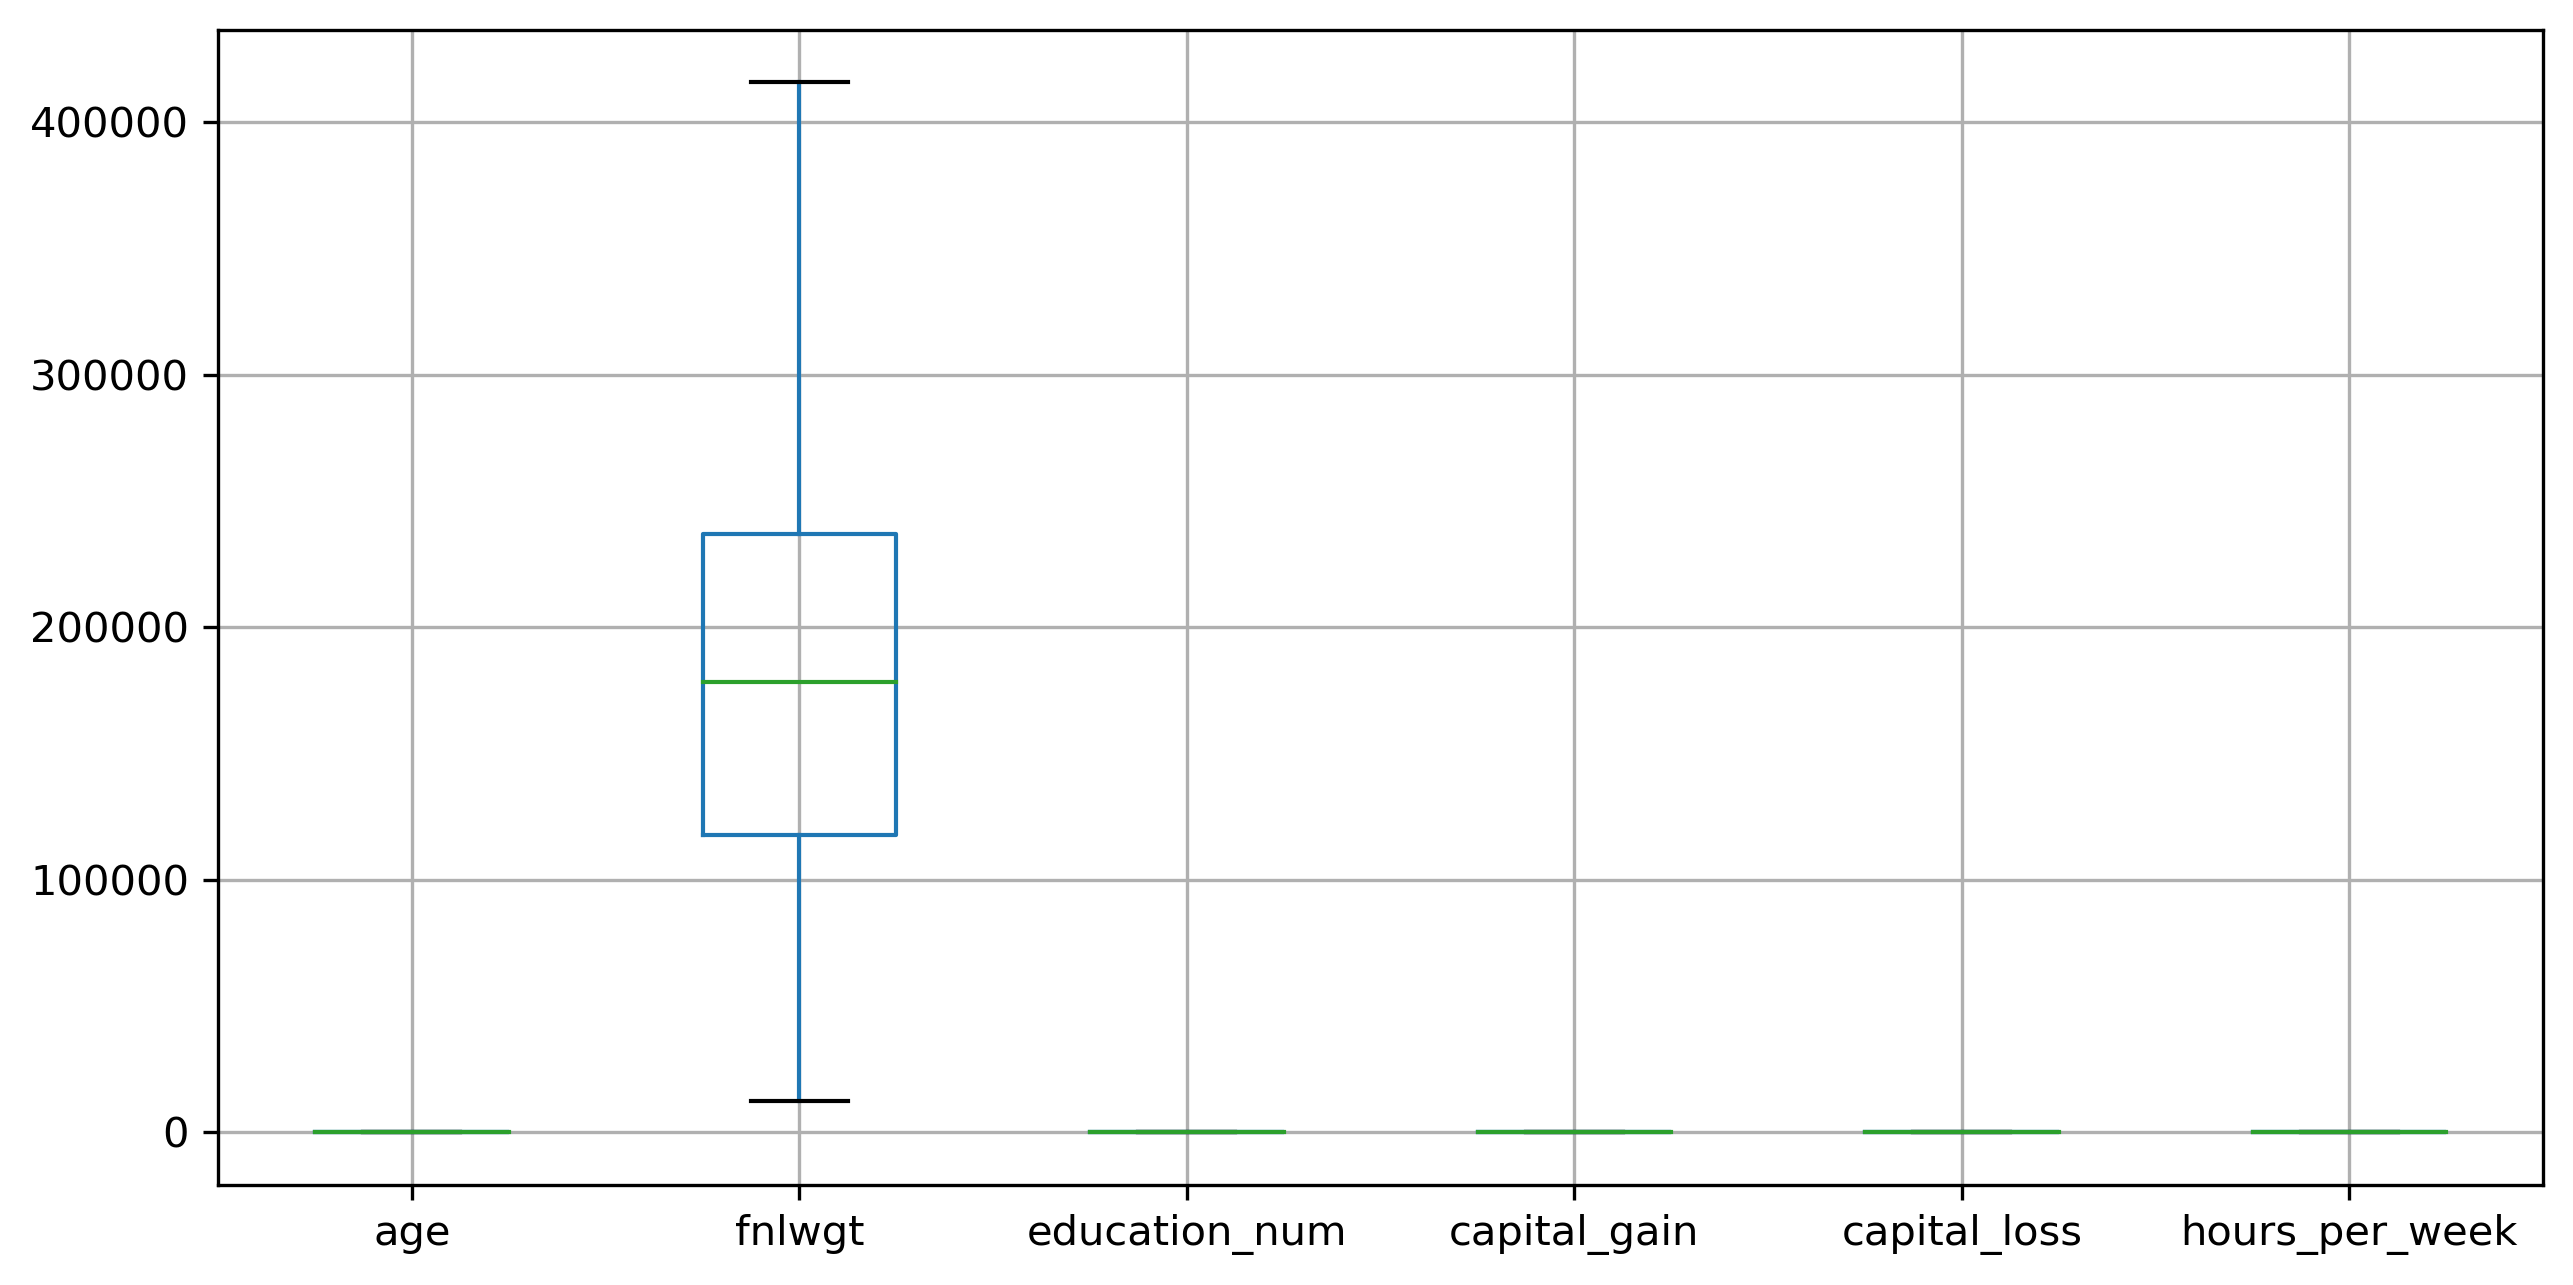

In [22]:
data.boxplot()

In [23]:
data.describe()

age         fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.000000   32537.000000   32537.000000       32537.0       32537.0   
mean      38.559855  186824.961736      10.125165           0.0           0.0   
std       13.554847   95118.115529       2.459436           0.0           0.0   
min       17.000000   12285.000000       4.500000           0.0           0.0   
25%       28.000000  117827.000000       9.000000           0.0           0.0   
50%       37.000000  178356.000000      10.000000           0.0           0.0   
75%       48.000000  236993.000000      12.000000           0.0           0.0   
max       78.000000  415742.000000      16.000000           0.0           0.0   

       hours_per_week  
count    32537.000000  
mean        41.203246  
std          6.187352  
min         32.500000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         52.500000

In [24]:
data['capital_gain'].value_counts(),data['capital_loss'].value_counts()

(0    32537
 Name: capital_gain, dtype: int64,
 0    32537
 Name: capital_loss, dtype: int64)

In [25]:
# we will drop these columns 
data.drop(columns = ['capital_gain','capital_loss'],inplace=True)

In [26]:
data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  hours_per_week  native_country  income  
0         Male            40.0   United-States   <=50K  
1         Male            32.5   United-States   <=50K  
2         Male            40.0   United-States   <=50K  
3         Male            40.0   United-States   <=50K  
4       Female            40.0            Cuba   <=50K  
...        ...             ...             ...     ...  
32556   Female            38.0   United-States   <=50K  
32557     Male            40.0   United-States    >50K  
32558   Female            40.0   United-States   <=50K  
32559     Male            32.5   United-States   <=50K  
32560   Female            40.0   United-States    >50K  

[32537 rows x 13 columns]

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [28]:
numeric_columns = data.select_dtypes(include = ['float','int']).columns

In [30]:
# 1. StandardScaler 
sc = StandardScaler()
sc_scaled = pd.DataFrame(sc.fit_transform(data[numeric_columns]), columns = numeric_columns)

In [31]:
sc_scaled

age    fnlwgt  education_num  hours_per_week
0      0.032472 -1.149209       1.168918       -0.194472
1      0.844002 -1.088284       1.168918       -1.406640
2     -0.041304  0.303007      -0.457496       -0.194472
3      1.065329  0.503550      -1.270703       -0.194472
4     -0.779058  1.593665       1.168918       -0.194472
...         ...       ...            ...             ...
32532 -0.852834  0.740954       0.762315       -0.517717
32533  0.106247 -0.341170      -0.457496       -0.194472
32534  1.434206 -0.367075      -0.457496       -0.194472
32535 -1.221711  0.154180      -0.457496       -1.406640
32536  0.991553  1.062927      -0.457496       -0.194472

[32537 rows x 4 columns]

In [32]:
sc_scaled.describe()

age        fnlwgt  education_num  hours_per_week
count  3.253700e+04  3.253700e+04   3.253700e+04    3.253700e+04
mean   1.489351e-16  5.568688e-18   3.173060e-16   -2.292989e-16
std    1.000015e+00  1.000015e+00   1.000015e+00    1.000015e+00
min   -1.590589e+00 -1.835009e+00  -2.287212e+00   -1.406640e+00
25%   -7.790584e-01 -7.254036e-01  -4.574962e-01   -1.944716e-01
50%   -1.150790e-01 -8.903763e-02  -5.089262e-02   -1.944716e-01
75%    6.964512e-01  5.274370e-01   7.623146e-01    6.136409e-01
max    2.909716e+00  2.406698e+00   2.388729e+00    1.825810e+00

In [33]:
# 2. MinMaxScaler
minmaxscaler = MinMaxScaler()
minmax_scaled = pd.DataFrame(minmaxscaler.fit_transform(data[numeric_columns]), columns = numeric_columns)

In [34]:
minmax_scaled

age    fnlwgt  education_num  hours_per_week
0      0.360656  0.161680       0.739130           0.375
1      0.540984  0.176044       0.739130           0.000
2      0.344262  0.504046       0.391304           0.375
3      0.590164  0.551325       0.217391           0.375
4      0.180328  0.808324       0.739130           0.375
...         ...       ...            ...             ...
32532  0.163934  0.607294       0.652174           0.275
32533  0.377049  0.352179       0.391304           0.375
32534  0.672131  0.346072       0.391304           0.375
32535  0.081967  0.468960       0.391304           0.000
32536  0.573770  0.683200       0.391304           0.375

[32537 rows x 4 columns]

In [35]:
minmax_scaled.describe()

age        fnlwgt  education_num  hours_per_week
count  32537.000000  32537.000000   32537.000000    32537.000000
mean       0.353440      0.432611       0.489145        0.435162
std        0.222211      0.235758       0.213864        0.309368
min        0.000000      0.000000       0.000000        0.000000
25%        0.180328      0.261594       0.391304        0.375000
50%        0.327869      0.411620       0.478261        0.375000
75%        0.508197      0.556957       0.652174        0.625000
max        1.000000      1.000000       1.000000        1.000000

### Encoding Techniques

In [36]:
# One-hot encoding for categorical columns with less than 5 categories
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [43]:
categorical_columns = data.select_dtypes(include = ['object','category'])

In [45]:
categorical_columns

workclass    education       marital_status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native_country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
32556        Tech-support            Wife   White   Female   United-States   
32557   Machine-op-inspct         Husband   White     Male   United-States   
32558        Adm-clerical       Unmarried   White   Female   United-States   
32559        Adm-clerical       Own-child   White     Male   United-States   
32560     Exec-managerial            Wife   White   Female   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32537 rows x 9 columns]

In [82]:
for i in categorical_columns :
    if(categorical_columns[i].nunique() <= 5):
        print(i)

race
sex
income


In [96]:
ohe_data = categorical_columns[['race','sex','income']]
ohe = OneHotEncoder(sparse_output = False)

In [99]:
encoded_array = ohe.fit_transform(ohe_data)

In [129]:
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(ohe_data.columns))

In [131]:
encoded_df

race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                           0.0                       0.0          0.0   
1                           0.0                       0.0          0.0   
2                           0.0                       0.0          0.0   
3                           0.0                       0.0          1.0   
4                           0.0                       0.0          1.0   
...                         ...                       ...          ...   
32532                       0.0                       0.0          0.0   
32533                       0.0                       0.0          0.0   
32534                       0.0                       0.0          0.0   
32535                       0.0                       0.0          0.0   
32536                       0.0                       0.0          0.0   

       race_ Other  race_ White  sex_ Female  sex_ Male  income_ <=50K  \
0              0.0          1.0          0.0        1.0            1.0   
1              0.0          1.0          0.0        1.0            1.0   
2              0.0          1.0          0.0        1.0            1.0   
3              0.0          0.0          0.0        1.0            1.0   
4              0.0          0.0          1.0        0.0            1.0   
...            ...          ...          ...        ...            ...   
32532          0.0          1.0          1.0        0.0            1.0   
32533          0.0          1.0          0.0        1.0            0.0   
32534          0.0          1.0          1.0        0.0            1.0   
32535          0.0          1.0          0.0        1.0            1.0   
32536          0.0          1.0          1.0        0.0            0.0   

       income_ >50K  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
32532           0.0  
32533           1.0  
32534           0.0  
32535           0.0  
32536           1.0  

[32537 rows x 9 columns]

In [134]:
final_enc_data = pd.concat([ohe_data,encoded_df],axis=1)

In [135]:
final_enc_data

race      sex  income  race_ Amer-Indian-Eskimo  \
0       White     Male   <=50K                       0.0   
1       White     Male   <=50K                       0.0   
2       White     Male   <=50K                       0.0   
3       Black     Male   <=50K                       0.0   
4       Black   Female   <=50K                       0.0   
...       ...      ...     ...                       ...   
28846     NaN      NaN     NaN                       0.0   
29157     NaN      NaN     NaN                       0.0   
30845     NaN      NaN     NaN                       0.0   
31993     NaN      NaN     NaN                       0.0   
32404     NaN      NaN     NaN                       0.0   

       race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                           0.0          0.0          0.0          1.0   
1                           0.0          0.0          0.0          1.0   
2                           0.0          0.0          0.0          1.0   
3                           0.0          1.0          0.0          0.0   
4                           0.0          1.0          0.0          0.0   
...                         ...          ...          ...          ...   
28846                       0.0          0.0          0.0          1.0   
29157                       0.0          0.0          0.0          1.0   
30845                       0.0          1.0          0.0          0.0   
31993                       0.0          0.0          0.0          1.0   
32404                       1.0          0.0          0.0          0.0   

       sex_ Female  sex_ Male  income_ <=50K  income_ >50K  
0              0.0        1.0            1.0           0.0  
1              0.0        1.0            1.0           0.0  
2              0.0        1.0            1.0           0.0  
3              0.0        1.0            1.0           0.0  
4              1.0        0.0            1.0           0.0  
...            ...        ...            ...           ...  
28846          0.0        1.0            0.0           1.0  
29157          0.0        1.0            1.0           0.0  
30845          1.0        0.0            1.0           0.0  
31993          0.0        1.0            0.0           1.0  
32404          1.0        0.0            1.0           0.0  

[32561 rows x 12 columns]

In [136]:
# now using LabelEncoder for the columns with greater than 5 categories
for i in categorical_columns :
    if categorical_columns[i].nunique() > 5 :
        print(i)

workclass
education
marital_status
occupation
relationship
native_country


In [139]:
LE_data = categorical_columns.drop(columns = ['race','sex','income'])

In [140]:
LE_data

workclass    education       marital_status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship  native_country  
0            Adm-clerical   Not-in-family   United-States  
1         Exec-managerial         Husband   United-States  
2       Handlers-cleaners   Not-in-family   United-States  
3       Handlers-cleaners         Husband   United-States  
4          Prof-specialty            Wife            Cuba  
...                   ...             ...             ...  
32556        Tech-support            Wife   United-States  
32557   Machine-op-inspct         Husband   United-States  
32558        Adm-clerical       Unmarried   United-States  
32559        Adm-clerical       Own-child   United-States  
32560     Exec-managerial            Wife   United-States  

[32537 rows x 6 columns]

In [142]:
LE = LabelEncoder()

In [143]:
for col in LE_data :
    LE_data[col] = LE.fit_transform(LE_data[col])

In [144]:
LE_data

workclass  education  marital_status  occupation  relationship  \
0              7          9               4           1             1   
1              6          9               2           4             0   
2              4         11               0           6             1   
3              4          1               2           6             0   
4              4          9               2          10             5   
...          ...        ...             ...         ...           ...   
32556          4          7               2          13             5   
32557          4         11               2           7             0   
32558          4         11               6           1             4   
32559          4         11               4           1             3   
32560          5         11               2           4             5   

       native_country  
0                  39  
1                  39  
2                  39  
3                  39  
4                   5  
...               ...  
32556              39  
32557              39  
32558              39  
32559              39  
32560              39  

[32537 rows x 6 columns]

### Feature Engineering

In [145]:
data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  hours_per_week  native_country  income  
0         Male            40.0   United-States   <=50K  
1         Male            32.5   United-States   <=50K  
2         Male            40.0   United-States   <=50K  
3         Male            40.0   United-States   <=50K  
4       Female            40.0            Cuba   <=50K  
...        ...             ...             ...     ...  
32556   Female            38.0   United-States   <=50K  
32557     Male            40.0   United-States    >50K  
32558   Female            40.0   United-States   <=50K  
32559     Male            32.5   United-States   <=50K  
32560   Female            40.0   United-States    >50K  

[32537 rows x 13 columns]

In [148]:
# we will create two features who'll help us to predict the model more efficiently 
# 1. age group 
data['Age_group'] = pd.cut(data['age'],bins = [0,25,35,45,55,65,100],
                          labels = ['<25', '26-35', '36-45', '46-55', '56-65', '65+'])
# age is often important to get info about the employee, 
# by creating age-group column model can better understand and predict the income base on the age demographics

In [149]:
data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  hours_per_week  native_country  income Age_group  
0         Male            40.0   United-States   <=50K     36-45  
1         Male            32.5   United-States   <=50K     46-55  
2         Male            40.0   United-States   <=50K     36-45  
3         Male            40.0   United-States   <=50K     46-55  
4       Female            40.0            Cuba   <=50K     26-35  
...        ...             ...             ...     ...       ...  
32556   Female            38.0   United-States   <=50K     26-35  
32557     Male            40.0   United-States    >50K     36-45  
32558   Female            40.0   United-States   <=50K     56-65  
32559     Male            32.5   United-States   <=50K       <25  
32560   Female            40.0   United-States    >50K     46-55  

[32537 rows x 14 columns]

In [152]:
# 2. Experience Level 
data['Experience_Level'] = data['age'] - 18 
data['Experience_Level'] = data['Experience_Level'].clip(lower=0)  
# This feature can provide insights into how work experience correlates with income levels. 
# More experience may correlate with higher income due to advancement opportunities and skills gained over time.

In [153]:
data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  hours_per_week  native_country  income Age_group  \
0         Male            40.0   United-States   <=50K     36-45   
1         Male            32.5   United-States   <=50K     46-55   
2         Male            40.0   United-States   <=50K     36-45   
3         Male            40.0   United-States   <=50K     46-55   
4       Female            40.0            Cuba   <=50K     26-35   
...        ...             ...             ...     ...       ...   
32556   Female            38.0   United-States   <=50K     26-35   
32557     Male            40.0   United-States    >50K     36-45   
32558   Female            40.0   United-States   <=50K     56-65   
32559     Male            32.5   United-States   <=50K       <25   
32560   Female            40.0   United-States    >50K     46-55   

       Experience_Level  
0                    21  
1                    32  
2                    20  
3                    35  
4                    10  
...                 ...  
32556                 9  
32557                22  
32558                40  
32559                 4  
32560                34  

[32537 rows x 15 columns]

### Feature Selection

In [155]:
# Isolation Forest
# importing again dataset to treat outliers using isolation forest 
data1 = pd.read_csv('adult_with_headers.csv')

In [156]:
from sklearn.ensemble import IsolationForest

In [179]:
data1_encoded = pd.get_dummies(data1)
data1_encoded.drop(columns = ['capital_gain','capital_loss'],inplace=True)

In [181]:
data1

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [182]:
data1_encoded['anomaly']=clf.predict(data1_encoded.iloc[:,0:])

In [183]:
data1_encoded

age  fnlwgt  education_num  hours_per_week  workclass_ ?  \
0       39   77516             13              40             0   
1       50   83311             13              13             0   
2       38  215646              9              40             0   
3       53  234721              7              40             0   
4       28  338409             13              40             0   
...    ...     ...            ...             ...           ...   
32556   27  257302             12              38             0   
32557   40  154374              9              40             0   
32558   58  151910              9              40             0   
32559   22  201490              9              20             0   
32560   52  287927              9              40             0   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                           0                     0                        0   
1                           0                     0                        0   
2                           0                     0                        0   
3                           0                     0                        0   
4                           0                     0                        0   
...                       ...                   ...                      ...   
32556                       0                     0                        0   
32557                       0                     0                        0   
32558                       0                     0                        0   
32559                       0                     0                        0   
32560                       0                     0                        0   

       workclass_ Private  workclass_ Self-emp-inc  ...  \
0                       0                        0  ...   
1                       0                        0  ...   
2                       1                        0  ...   
3                       1                        0  ...   
4                       1                        0  ...   
...                   ...                      ...  ...   
32556                   1                        0  ...   
32557                   1                        0  ...   
32558                   1                        0  ...   
32559                   1                        0  ...   
32560                   0                        1  ...   

       native_country_ South  native_country_ Taiwan  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
32556                      0                       0   
32557                      0                       0   
32558                      0                       0   
32559                      0                       0   
32560                      0                       0   

       native_country_ Thailand  native_country_ Trinadad&Tobago  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   
...                         ...                              ...   
32556                         0                                0   
32557                         0                                0   
32558                         0                                0   
32559                         0                                0   
32560                         0                                0   

       native_country_ United-States  nati

In [184]:
data1_encoded[data1_encoded['anomaly']==-1]
# all these are outliers 

age  fnlwgt  education_num  hours_per_week  workclass_ ?  \
15      34  245487              4              45             0   
27      54  180211             10              60             1   
152     33  163003             13              40             0   
157     71  494223             10               2             0   
226     60   24215              6              10             1   
...    ...     ...            ...             ...           ...   
32428   39  110622             13              40             0   
32432   36  208068              1              72             0   
32479   64  222966              4              40             0   
32531   30   33811             13              99             1   
32553   32  116138             14              11             0   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
15                          0                     0                        0   
27                          0                     0                        0   
152                         0                     0                        0   
157                         0                     0                        0   
226                         0                     0                        0   
...                       ...                   ...                      ...   
32428                       1                     0                        0   
32432                       0                     0                        0   
32479                       0                     0                        0   
32531                       0                     0                        0   
32553                       0                     0                        0   

       workclass_ Private  workclass_ Self-emp-inc  ...  \
15                      1                        0  ...   
27                      0                        0  ...   
152                     1                        0  ...   
157                     0                        0  ...   
226                     0                        0  ...   
...                   ...                      ...  ...   
32428                   0                        0  ...   
32432                   1                        0  ...   
32479                   0                        0  ...   
32531                   0                        0  ...   
32553                   1                        0  ...   

       native_country_ South  native_country_ Taiwan  \
15                         0                       0   
27                         1                       0   
152                        0                       0   
157                        0                       0   
226                        0                       0   
...                      ...                     ...   
32428                      0                       0   
32432                      0                       0   
32479                      0                       0   
32531                      0                       0   
32553                      0                       1   

       native_country_ Thailand  native_country_ Trinadad&Tobago  \
15                            0                                0   
27                            0                                0   
152                           0                                0   
157                           0                                0   
226                           0                                0   
...                         ...                              ...   
32428                         0                                0   
32432                         0                                0   
32479                         0                                0   
32531                         0                                0   
32553                         0                                0   

       native_country_ United-States  nati

In [193]:
# pps score
import ppscore as pps
data2 = pd.read_csv('adult_with_headers.csv')

In [194]:
data2

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [196]:
pps.matrix(data2)

x               y   ppscore            case  is_valid_score  \
0       age             age  1.000000  predict_itself            True   
1       age       workclass  0.011232  classification            True   
2       age          fnlwgt  0.000000      regression            True   
3       age       education  0.052315  classification            True   
4       age   education_num  0.000000      regression            True   
..      ...             ...       ...             ...             ...   
220  income    capital_gain  0.000000      regression            True   
221  income    capital_loss  0.000000      regression            True   
222  income  hours_per_week  0.000000      regression            True   
223  income  native_country  0.000000  classification            True   
224  income          income  1.000000  predict_itself            True   

                  metric  baseline_score   model_score  \
0                   None        0.000000      1.000000   
1            weighted F1        0.579088      0.583816   
2    mean absolute error    75872.186200  77535.141544   
3            weighted F1        0.201200      0.242989   
4    mean absolute error        1.853000      1.898306   
..                   ...             ...           ...   
220  mean absolute error     1093.884000   1760.682115   
221  mean absolute error       94.942600    176.261353   
222  mean absolute error        7.656400      8.097596   
223          weighted F1        0.841082      0.841082   
224                 None        0.000000      1.000000   

                        model  
0                        None  
1    DecisionTreeClassifier()  
2     DecisionTreeRegressor()  
3    DecisionTreeClassifier()  
4     DecisionTreeRegressor()  
..                        ...  
220   DecisionTreeRegressor()  
221   DecisionTreeRegressor()  
222   DecisionTreeRegressor()  
223  DecisionTreeClassifier()  
224                      None  

[225 rows x 9 columns]